<a href="https://colab.research.google.com/github/SSJorge01/CHECKPOINT01_SEM02---SERS/blob/main/SERS_CP1_2SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [30]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Essas duas variáveis representam diferentes tipos de potência, a Global_active_power é a energia que você usa para ligar suas luzes e aparelhos (medida em quilowatts [kW]), enquanto a Global_reactive_power é a energia "extra" que alguns equipamentos precisam para funcionar, mas que não se transforma em trabalho útil (medida em quilovolt-ampères reativos [kVAr].).



3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [31]:
df1 = df.drop(columns=['Date', 'Time'])
df1 = df1.apply(pd.to_numeric, errors='coerce')
df1 = df1.merge(df[['Date', 'Time']], left_index=True, right_index=True)
colunas_ordenadas = ['Date', 'Time'] + [col for col in df1.columns if col not in ['Date', 'Time']]
df1 = df1[colunas_ordenadas]
print(df1.isnull().sum())

Date                         0
Time                         0
Global_active_power      43610
Global_reactive_power    43610
Voltage                  43610
Global_intensity         43610
Sub_metering_1           43611
Sub_metering_2           43611
Sub_metering_3           43611
dtype: int64


In [32]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce', dayfirst=True)
df1['Day_of_Week'] = df1['Date'].dt.dayofweek

5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [33]:
df1_2007 = df1[df1['Date'].dt.year == 2007]
media_consumo_diario_2007 = df1_2007.groupby('Date')['Global_active_power'].mean()
display(media_consumo_diario_2007)

,Global_active_power
Date,
2007-01-01,1.909031
2007-01-02,0.881414
2007-01-03,0.704204
2007-01-04,2.263481
2007-01-05,1.884281
...,...
2007-12-27,1.758471
2007-12-28,2.161842
2007-12-29,2.290942


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

<Axes: xlabel='Time'>

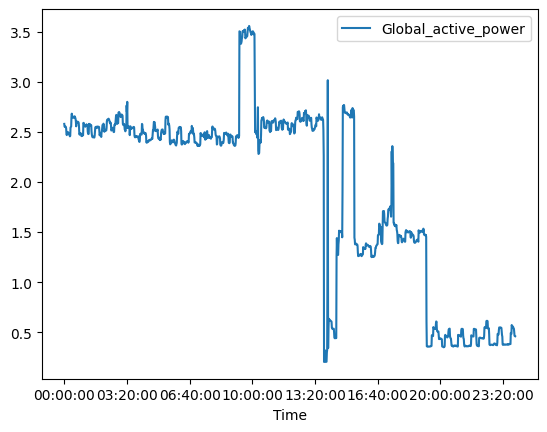

In [34]:
dia_escolhido = '2007-01-01'
df1_dia_escolhido = df1[df1['Date'] == dia_escolhido]
df1_dia_escolhido.plot(x='Time', y='Global_active_power')

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

Pode ser observado que o histograma possui distribuição normal, em que a maioria dos dados se agrupa em torno da média, com a frequência diminuindo gradualmente à medida que nos afastamos desse valor central. Isso indica que a tensão na rede elétrica se mantém relativamente estável na maior parte do tempo, com menos ocorrências de valores extremos.

<Axes: ylabel='Frequency'>

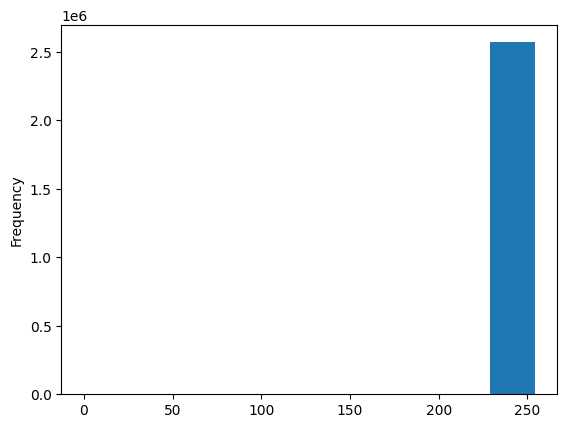

In [36]:
df1['Voltage'].plot.hist()

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [37]:
consumo_medio_por_mes = df1.groupby(df1['Date'].dt.month)['Global_active_power'].mean()
display(consumo_medio_por_mes)

,Global_active_power
Date,
1.0,1.456160
2.0,1.315413
3.0,1.211651
4.0,1.043106
5.0,1.042714
6.0,0.921431
7.0,0.704503
8.0,0.576047
9.0,0.972104
